# Neural Network for MNIST Data Set

#### Classify 10 Different Numbers without TensorFlow
In this NoteBook we will create a nerual network that can classify HandWriten Images in 10 different categories, first we will start by importing the libraries for using MNIST

MNIST is a Data set that is udes specifically for people that start right now with Machine Learning and Neural Network and want to build something without having to worry about data sets regularization of the data and in general the input of the algorithm

This dataset will provide 6000 images all of them with size $[28,28]$ 

## Importing the MNIST DataSet

In [78]:
import mnist
import scipy.misc
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np

The next step is to use *mnist* in order to save in different variables the images and labels of the training and test sets.

In [79]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [17]:
print(train_images.shape)

(60000, 28, 28)


You can show the images just by writing ***plt.imshow*** and then use the specific image with this command line ***train_images[5,:,:]***

Don't forget to show the results just by writing ***plt.show()***

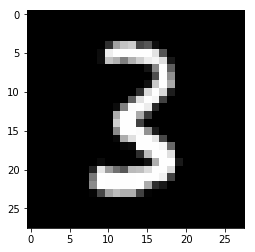

 The number in this image is  3


In [18]:
Index = 50000

imgplot = plt.imshow(train_images[Index,:,:], cmap = 'gray')
plt.show()

print(" The number in this image is ", train_labels[Index])

It is really important to transform every image into a vector with $28*28 = 784$ features, this enable as to use this images - pixels as idividuals features that will be used as input in the Nueral Network

In [28]:
print(train_images.shape)
num_Imag = train_images.shape[0]
nH = train_images.shape[1]
nW = train_images.shape[2]
Tr_Im = train_images.reshape((num_Imag,nH*nW))
Tr_lab = train_labels
print(Tr_Im.shape)
m=num_Imag # This is the number of input images

(60000, 28, 28)
(60000, 784)


In [70]:
def HotVector(targets,n_labels):
    Ytr = np.zeros((targets.shape[0], n_labels)) #empty one-hot matrix
    Ytr[np.arange(targets.shape[0]), targets] = 1 #set target idx to 1

    Ytr=np.transpose(Ytr)

    print(Ytr[:,0:5]) # We will show only the first 5 results

    print(Ytr.shape)
    return Ytr

In [71]:
n_labels = 10 # How many labels we have (10 different numbers)


targets = train_labels
print(targets[0:5]) # We will show only the first 5 results
print(targets.shape)
Ytr = HotVector(targets,n_labels)
Ytr=Ytr.T
print(Ytr.shape)

[5 0 4 1 9]
(60000,)
[[0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]]
(10, 60000)
(60000, 10)


# TensorFlow

In [72]:
import tensorflow as tf

In [73]:
x = tf.placeholder(tf.float32, [None, 784]) 

W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
init = tf.initialize_all_variables()


y = tf.nn.softmax(tf.add(tf.matmul(x, W),b))

y_ = tf.placeholder(tf.float32, [None, 10])

tf.argmax() -> culculates the largest element in each row.

With this way we have the ability to see the predicted class in each row

In [74]:
#cross_entropy = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(y), reduction_indices=[1]))

cross_entropy = -tf.reduce_sum(y_* tf.log(y))
cost = tf.reduce_mean(cross_entropy)

#cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,labels=Y) # We need to use logits intead of y because we will do 2 times the sofmax function
#cost = tf.reduce_mean(cross_entropy)

#cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))


In [75]:
optimizer = tf.train.GradientDescentOptimizer(0.0000003)
train_step = optimizer.minimize(cost)
#train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)


In [76]:
sess = tf.Session() # Start a new session 
sess.run(init)

In [77]:
for i in range(500):
    
    Xt = Tr_Im[0:300,:]
    Yt = Ytr[0:300,:]
    
    train_data = {x: Xt,y_: Yt}
    
    cost = sess.run(train_step, feed_dict = train_data)
    
    print(cost)
    #sess.run(cost)

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


In [54]:
sess.run(b)

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], dtype=float32)